<a href="https://colab.research.google.com/github/kjyothiswaroop/SHALA2020/blob/master/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [4]:
attrition_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [5]:
attrition_data.Department.unique()
attrition_data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [0]:
#First let us drop some irrelevant columns like the Employee ID
attrition_data=attrition_data.drop('ID',axis=1)

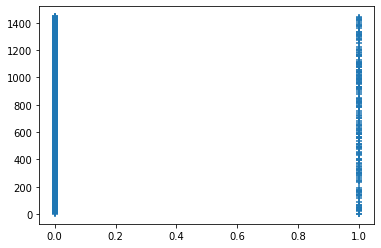

In [7]:
plt.scatter(attrition_data.Attrition,attrition_data.EmployeeNumber,marker='+')
attrition_data=attrition_data.drop('EmployeeNumber',axis=1)

In [0]:
#Removing EmployeeCount
attrition_data=attrition_data.drop('EmployeeCount',axis=1)
#Looking at the Correlation values further the performance rating has the least correlation with Attrition so it is safe to say that we can remove that column too
attrition_data=attrition_data.drop('PerformanceRating',axis=1)

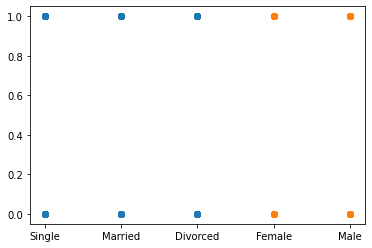

In [10]:
a=plt.scatter(attrition_data.MaritalStatus,attrition_data.Attrition)
b=plt.scatter(attrition_data.Gender,attrition_data.Attrition)
#Further the scatter plot shows there is no effect of marital status and gender on Attirition so we remove those two columns also
attrition_data=attrition_data.drop(['Gender','MaritalStatus'],axis=1)

In [11]:
 #monthlyincome and joblevel are highly correlated so eliminating it.
 attrition_data=attrition_data.drop('JobLevel',axis=1)
 attrition_data.head()
 attrition_data['EducationField'].value_counts()

Life Sciences       427
Medical             320
Marketing           119
Technical Degree     90
Other                57
Human Resources      15
Name: EducationField, dtype: int64

In [12]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EnvironmentSatisfaction   1028 non-null   int64 
 9   HourlyRate                1028 non-null   int64 
 10  JobInvolvement            1028 non-null   int64 
 11  JobRole                   1028 non-null   object
 12  JobSatisfaction           1028 non-null   int64 
 13  MonthlyIncome             1028 non-null   int64 
 14  MonthlyRate             

In [0]:
#Using one Hot Encoding
attrition_data=pd.get_dummies(data=attrition_data,columns=['BusinessTravel','Department'])

In [0]:
#Now we apply Label Encoding for Education Field and JobRole
Lab=LabelEncoder()
attrition_data['JobRole']=Lab.fit_transform(attrition_data['JobRole'])
attrition_data['EducationField']=Lab.fit_transform(attrition_data['EducationField'])

In [0]:
#Applying Binary encoding for Overtime
attrition_data['OverTime']=np.where(attrition_data.OverTime=='Yes',1,0)

In [16]:
attrition_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1102,1,2,1,2,94,3,7,4,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1
1,49,0,279,8,1,1,3,61,2,6,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0
2,37,1,1373,2,2,4,4,92,2,2,3,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0
3,33,0,1392,3,4,1,4,56,3,6,3,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0
4,27,0,591,2,1,3,1,40,3,2,2,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0


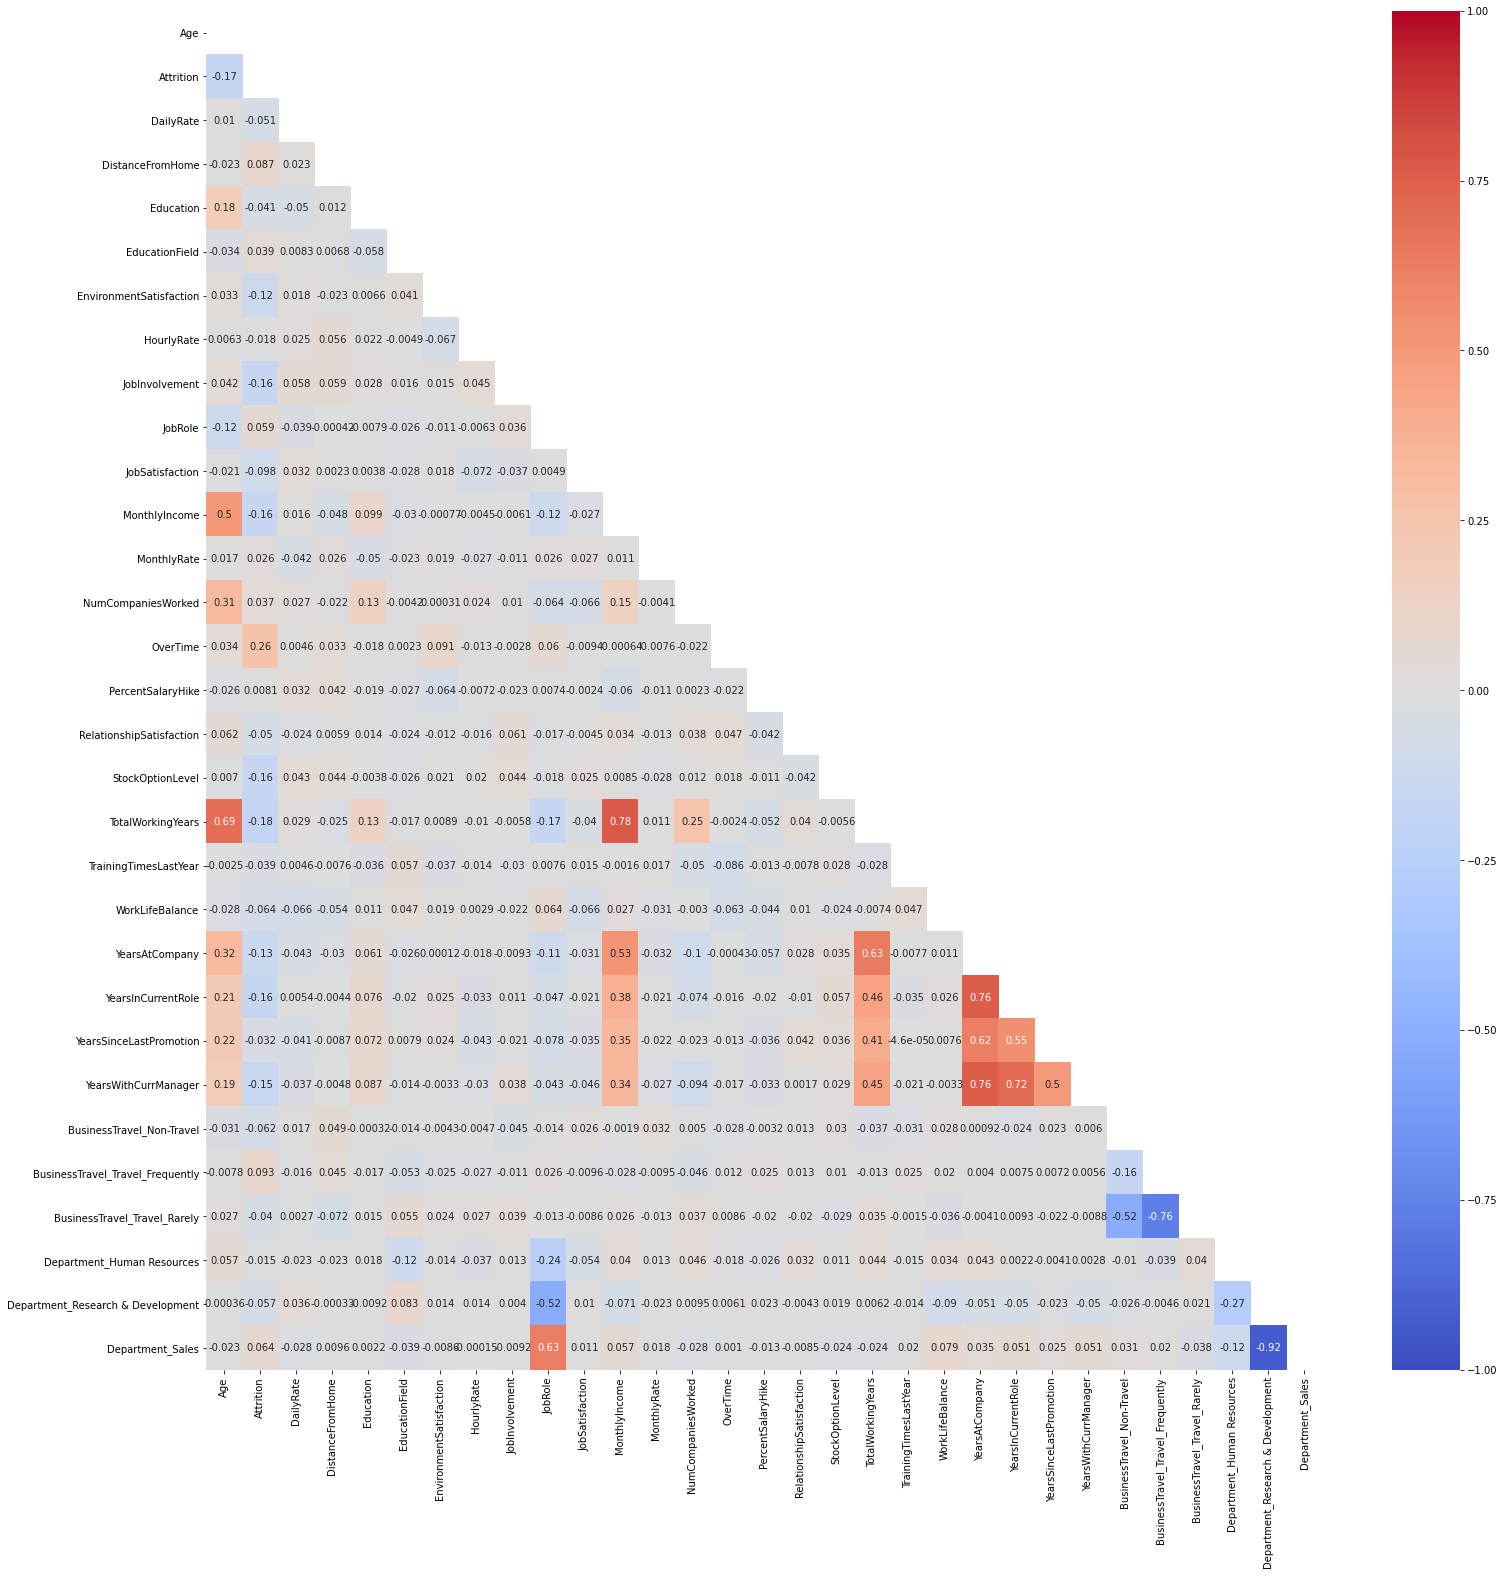

In [38]:
plt.figure(figsize=(25,25))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
plt.show()

In [0]:
from sklearn import preprocessing
y=attrition_data.Attrition
x_temp=attrition_data.drop('Attrition',axis=1)
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max_scaler.fit_transform(x_temp)


In [18]:
#RandomForestRegressor model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=50,
                            random_state=1111,
                            max_features=6) 
rfc.fit(X_train, y_train)
print(accuracy_score(y_train,rfc.predict(X_train)))
print(accuracy_score(y_test,rfc.predict(X_test)))
#Accuracy,Precision,ROCcurve etc.
print(confusion_matrix(y_test,rfc.predict(X_test)))
print("-"*60)
print(classification_report(y_test,rfc.predict(X_test)))


0.9975669099756691
0.8495145631067961
[[170   2]
 [ 29   5]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       172
           1       0.71      0.15      0.24        34

    accuracy                           0.85       206
   macro avg       0.78      0.57      0.58       206
weighted avg       0.83      0.85      0.81       206



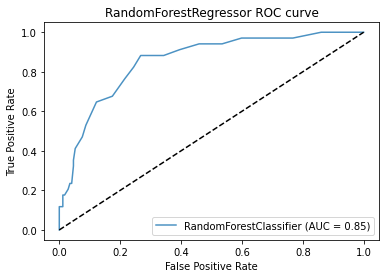

In [19]:
#Plotting the ROC curve for RandomForestRegressor
from sklearn.metrics import plot_roc_curve
ax=plt.gca()  
rfc_disp=plot_roc_curve(rfc,X_test,y_test,ax=ax,alpha=0.8)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestRegressor ROC curve')
plt.show()

In [20]:
#Instead of train_test_split we shall now use Crossvalidation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123)
results = cross_val_score(rfc, X_train, y_train, cv=kfold)
print(results)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.79518072 0.90361446 0.81707317 0.86585366 0.82926829 0.84146341
 0.81707317 0.90243902 0.84146341 0.92682927]


0.8710462287104623
0.8446601941747572
[[165   7]
 [ 25   9]]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       172
           1       0.56      0.26      0.36        34

    accuracy                           0.84       206
   macro avg       0.72      0.61      0.64       206
weighted avg       0.82      0.84      0.82       206



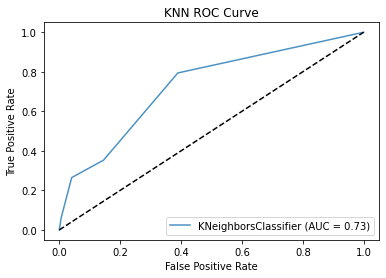

In [27]:
#KNearestNeighbours
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(accuracy_score(y_train,knn.predict(X_train)))
print(accuracy_score(y_test,knn.predict(X_test)))
#Accuracy,Precision,ROCcurve etc.
print(confusion_matrix(y_test,knn.predict(X_test)))
print("+-+-"*30)
print(classification_report(y_test,knn.predict(X_test)))
#plotting ROC
ax=plt.gca()  
knn_disp=plot_roc_curve(knn,X_test,y_test,ax=ax,alpha=0.8)
plt.title('KNN ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

0.9525547445255474
0.8106796116504854
[[157  15]
 [ 24  10]]
************************************************************
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       172
           1       0.40      0.29      0.34        34

    accuracy                           0.81       206
   macro avg       0.63      0.60      0.61       206
weighted avg       0.79      0.81      0.80       206



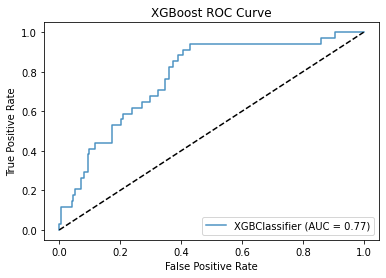

In [35]:
#XGBoost Classifier
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(learningrate=0.01)
xgb_clf.fit(X_train,y_train)
print(accuracy_score(y_train,xgb_clf.predict(X_train)))
print(accuracy_score(y_test,xgb_clf.predict(X_test)))
#Accuracy,Precision,ROCcurve etc.
print(confusion_matrix(y_test,xgb_clf.predict(X_test)))
print("**"*30)
print(classification_report(y_test,xgb_clf.predict(X_test)))
#PLotting ROC curve
ax=plt.gca()
xgb_clf_disp=plot_roc_curve(xgb_clf,X_test,y_test,ax=ax,alpha=0.8)
plt.title('XGBoost ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  